<a href="https://colab.research.google.com/github/najla-alhusaini/it326-telco-churn/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Phase 2: Data Summarization and Preprocessing
##Telco Customer Churn Dataset




## Setup and Initial Data Loading

**` Imports and Setup`**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


**` Load Dataset file`**

In [ ]:
# upload dataset
from google.colab import files
import pandas as pd
import io

print("Please upload your dataset file...")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Dataset loaded successfully!\n")

Please upload your dataset file...


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Uploaded file: WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset loaded successfully!



**`Load dataset`**

In [ ]:
# Load the dataset
print("Loading Telco Customer Churn Dataset...")
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset loaded successfully!\n")
# Create a copy for preprocessing
df_processed = df.copy()

Loading Telco Customer Churn Dataset...
Dataset loaded successfully!



**`Display basic information`**

In [ ]:
# Display basic information
print("="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}\n")

print("Dataset Columns and Data Types:")
print(df.dtypes)

print("\n" + "="*50)
# Display first few rows
print("2. DATASET SNAPSHOT (First 10 rows)")
print("="*50)
display(df.head(10))

# Statistical summary for numerical features
print("="*50)
print("3. STATISTICAL SUMMARY FOR NUMERICAL FEATURES")
print("="*50)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

if numerical_cols:
    display(df[numerical_cols].describe())
else:
    print("No numerical columns found!")

BASIC DATASET INFORMATION
Dataset Shape: (7043, 21)
Number of Rows: 7043
Number of Columns: 21

Dataset Columns and Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

2. DATASET SNAPSHOT (First 10 rows)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


3. STATISTICAL SUMMARY FOR NUMERICAL FEATURES
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**`Missing values analysis `**

In [ ]:
# Check for missing values
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})
missing_info = missing_info[missing_info['Missing Values'] > 0]

if not missing_info.empty:
    display(missing_info)

    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_info['Percentage'].plot(kind='bar')
    plt.title('Missing Values Percentage by Column')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

# Check for empty strings or special missing values
print("\nChecking for special missing values (empty strings, etc.)...")
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col] == '').sum() + (df[col] == ' ').sum() + (df[col] == 'NA').sum()
        if empty_count > 0:
            print(f"Column '{col}' has {empty_count} empty/special values")

MISSING VALUES ANALYSIS
No missing values found in the dataset!

Checking for special missing values (empty strings, etc.)...
Column 'TotalCharges' has 11 empty/special values


**`Class label distribution`**

CLASS LABEL DISTRIBUTION (Churn)
Churn Distribution:
No: 5174 (73.46%)
Yes: 1869 (26.54%)


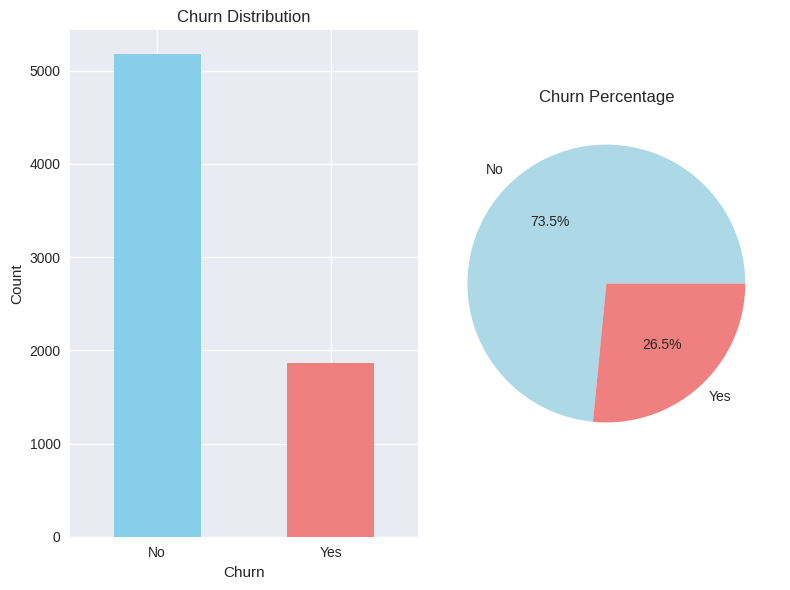

In [ ]:
# Class label distribution
print("="*50)
print("CLASS LABEL DISTRIBUTION (Churn)")
print("="*50)
if 'Churn' in df.columns:
    churn_distribution = df['Churn'].value_counts()
    churn_percentage = df['Churn'].value_counts(normalize=True) * 100

    print("Churn Distribution:")
    for label in churn_distribution.index:
        print(f"{label}: {churn_distribution[label]} ({churn_percentage[label]:.2f}%)")

    # Plot class distribution
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    churn_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.subplot(1, 2, 2)
    plt.pie(churn_distribution.values, labels=churn_distribution.index,
            autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Churn Percentage')

    plt.tight_layout()
    plt.show()
else:
    print("Churn column not found!")

## Data Visualization  

**`Plot 1: Histograms for numerical features`**

Plot 1: Histograms of Numerical Features


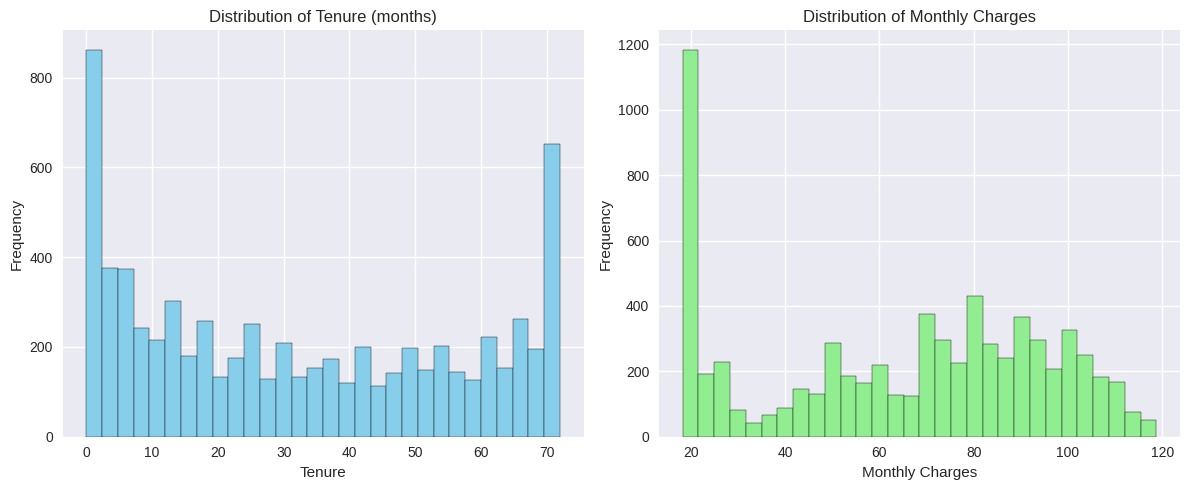

Histograms show the distribution of numerical features. This helps identify:
- Data skewness and outliers
- Need for normalization if distributions are very different
- Understanding customer behavior patterns


In [ ]:
 # Plot 1: Histograms for numerical features
print("Plot 1: Histograms of Numerical Features")
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Tenure distribution
    df['tenure'].hist(bins=30, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Tenure (months)')
    axes[0].set_xlabel('Tenure')
    axes[0].set_ylabel('Frequency')

    # Monthly Charges distribution
    df['MonthlyCharges'].hist(bins=30, ax=axes[1], color='lightgreen', edgecolor='black')
    axes[1].set_title('Distribution of Monthly Charges')
    axes[1].set_xlabel('Monthly Charges')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Histograms show the distribution of numerical features. This helps identify:")
    print("- Data skewness and outliers")
    print("- Need for normalization if distributions are very different")
    print("- Understanding customer behavior patterns")

**`Plot 2: Boxplots for numerical features `**


Plot 2: Boxplots for Numerical Features (Outlier Detection)


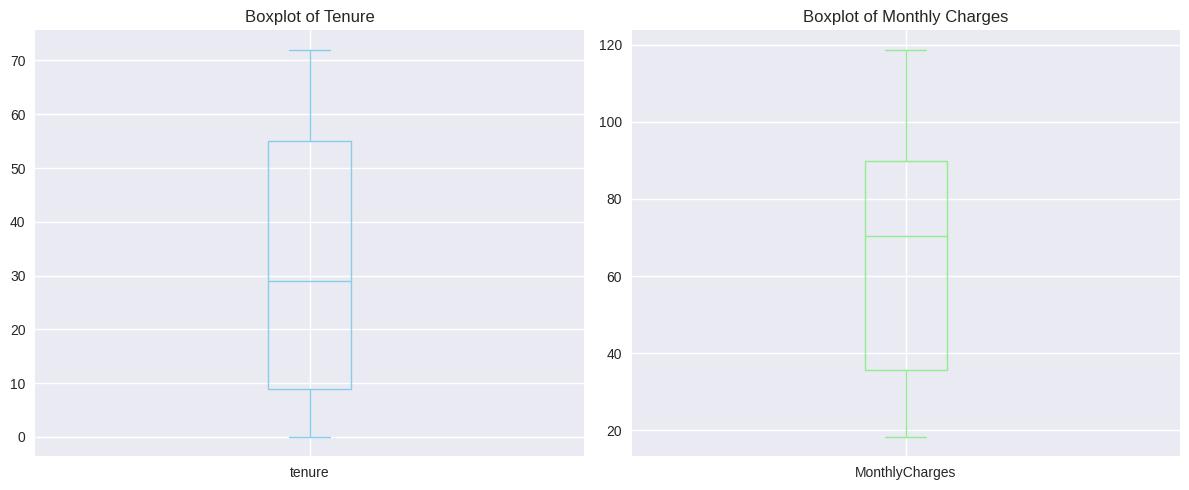

Boxplots help identify:
- Outliers that may need special treatment
- Data spread and quartile information
- Symmetry of the distribution


In [ ]:
# Plot 2: Boxplots for numerical features (outlier detection)
print("\nPlot 2: Boxplots for Numerical Features (Outlier Detection)")
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    df.boxplot(column='tenure', ax=axes[0], color='skyblue')
    axes[0].set_title('Boxplot of Tenure')

    df.boxplot(column='MonthlyCharges', ax=axes[1], color='lightgreen')
    axes[1].set_title('Boxplot of Monthly Charges')

    plt.tight_layout()
    plt.show()

    print("Boxplots help identify:")
    print("- Outliers that may need special treatment")
    print("- Data spread and quartile information")
    print("- Symmetry of the distribution")

**`Plot 3: Bar plot for categorical features`**


Plot 3: Bar Plot for Contract Type


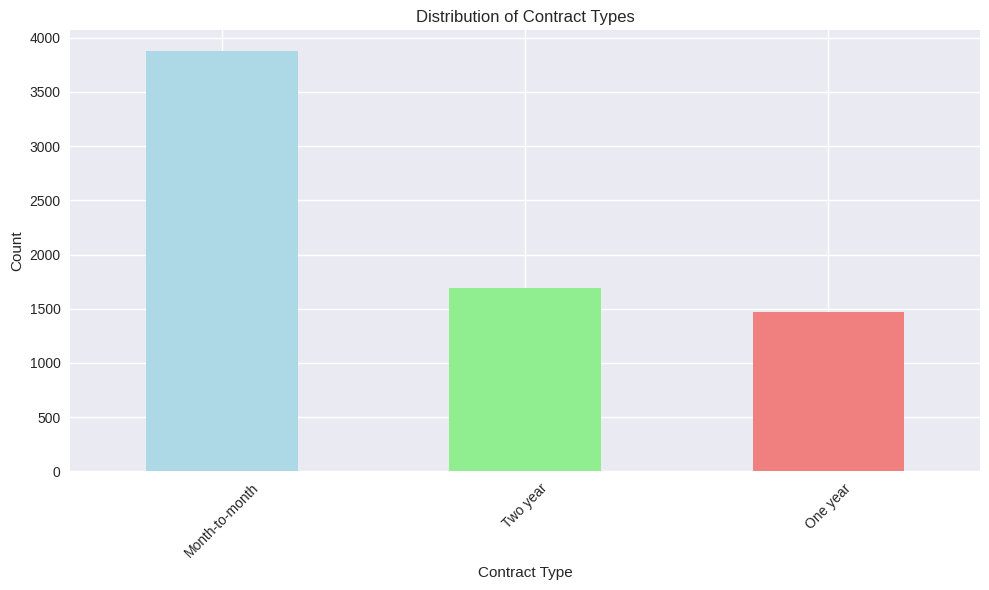

Bar plots for categorical features help:
- Understand frequency distribution of categories
- Identify imbalanced categories that may need encoding
- Plan for one-hot encoding or label encoding


In [ ]:
# Plot 3: Bar plot for categorical features
print("\nPlot 3: Bar Plot for Contract Type")
if 'Contract' in df.columns:
    plt.figure(figsize=(10, 6))
    contract_dist = df['Contract'].value_counts()
    contract_dist.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Distribution of Contract Types')
    plt.xlabel('Contract Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("Bar plots for categorical features help:")
    print("- Understand frequency distribution of categories")
    print("- Identify imbalanced categories that may need encoding")
    print("- Plan for one-hot encoding or label encoding")

**`Plot 4: Scatter plot (if applicable)`**

In [ ]:
# Plot 4: Scatter plot (if applicable)
print("\nPlot 4: Scatter Plot - Tenure vs Monthly Charges colored by Churn")
if all(col in df.columns for col in ['tenure', 'MonthlyCharges', 'Churn']):
    plt.figure(figsize=(10, 6))

    # Convert Churn to numeric for coloring
    churn_numeric = df['Churn'].map({'Yes': 1, 'No': 0})

    scatter = plt.scatter(df['tenure'], df['MonthlyCharges'],
                         c=churn_numeric, cmap='coolwarm', alpha=0.6)
    plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Monthly Charges ($)')
    plt.title('Tenure vs Monthly Charges (Colored by Churn)')
    plt.tight_layout()
    plt.show()

    print("Scatter plots help identify:")
    print("- Relationships between variables")
    print("- Patterns that might predict churn")
    print("- Clusters or groups in the data")

**`Five-number summary for numerical features`**

In [ ]:
# Five-number summary for numerical features
print("="*50)
print("FIVE-NUMBER SUMMARY FOR NUMERICAL FEATURES")
print("="*50)
if numerical_cols:
    five_num_summary = df[numerical_cols].describe().loc[['min', '25%', '50%', '75%', 'max']]
    display(five_num_summary)

    print("Five-number summary provides:")
    print("- Minimum, Q1, Median, Q3, Maximum values")
    print("- Understanding of data spread and central tendency")
    print("- Basis for outlier detection using IQR method")

FIVE-NUMBER SUMMARY FOR NUMERICAL FEATURES


,SeniorCitizen,tenure,MonthlyCharges
min,0.0,0.0,18.25
25%,0.0,9.0,35.50
50%,0.0,29.0,70.35
75%,0.0,55.0,89.85
max,1.0,72.0,118.75


Five-number summary provides:
- Minimum, Q1, Median, Q3, Maximum values
- Understanding of data spread and central tendency
- Basis for outlier detection using IQR method


## DATA PREPROCESSING

**`Handle TotalCharges column (convert to numeric, handle errors)`**

In [ ]:
# Preprocessing Step 1: Handle TotalCharges column (convert to numeric, handle errors)
print("\nPreprocessing Step 1: Handling TotalCharges Column")
if 'TotalCharges' in df_processed.columns:
    print("Converting TotalCharges to numeric...")
    # Convert to numeric, errors will become NaN
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

    # Check for newly created NaN values
    new_nans = df_processed['TotalCharges'].isnull().sum()
    print(f"Created {new_nans} NaN values during conversion")

    # Fill NaN values with 0 (assuming new customers with no charges)
    df_processed['TotalCharges'].fillna(0, inplace=True)
    print("NaN values filled with 0")

    print("Justification: TotalCharges contained non-numeric values that needed conversion.")
    print("Improvement: Now we can use this column for numerical analysis.")


Preprocessing Step 1: Handling TotalCharges Column
Converting TotalCharges to numeric...
Created 11 NaN values during conversion
NaN values filled with 0
Justification: TotalCharges contained non-numeric values that needed conversion.
Improvement: Now we can use this column for numerical analysis.


**`Handle categorical variables (Encoding)`**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Preprocessing Step 2: Handle categorical variables (Encoding)
print("\nPreprocessing Step 2: Encoding Categorical Variables")
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
# Remove customerID and Churn (target variable) from encoding list
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical columns to encode: {categorical_cols}")

# Apply label encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded column: {col}")

print("Justification: Machine learning algorithms require numerical input.")
print("Improvement: All features are now numerical and ready for modeling.")


Preprocessing Step 2: Encoding Categorical Variables
Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Encoded column: gender
Encoded column: Partner
Encoded column: Dependents
Encoded column: PhoneService
Encoded column: MultipleLines
Encoded column: InternetService
Encoded column: OnlineSecurity
Encoded column: OnlineBackup
Encoded column: DeviceProtection
Encoded column: TechSupport
Encoded column: StreamingTV
Encoded column: StreamingMovies
Encoded column: Contract
Encoded column: PaperlessBilling
Encoded column: PaymentMethod
Justification: Machine learning algorithms require numerical input.
Improvement: All features are now numerical and ready for modeling.


**`Normalize numerical features`**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Preprocessing Step 3: Normalize numerical features
print("\nPreprocessing Step 3: Normalizing Numerical Features")
# Identify numerical columns after encoding
numerical_cols_processed = df_processed.select_dtypes(include=[np.number]).columns.tolist()
# Remove customerID and Churn from normalization
if 'customerID' in numerical_cols_processed:
    numerical_cols_processed.remove('customerID')
if 'Churn' in numerical_cols_processed:
    numerical_cols_processed.remove('Churn')

print(f"Numerical columns to normalize: {numerical_cols_processed}")

if numerical_cols_processed:
    scaler = StandardScaler()
    df_processed[numerical_cols_processed] = scaler.fit_transform(df_processed[numerical_cols_processed])
    print("Applied StandardScaler normalization")

    print("Justification: Features have different scales (tenure vs charges).")
    print("Improvement: Prevents dominance of features with larger scales.")



Preprocessing Step 3: Normalizing Numerical Features
Numerical columns to normalize: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Applied StandardScaler normalization
Justification: Features have different scales (tenure vs charges).
Improvement: Prevents dominance of features with larger scales.


**`Encode target variable`**

In [ ]:
# Preprocessing Step 4: Encode target variable
print("\nPreprocessing Step 4: Encoding Target Variable (Churn)")
if 'Churn' in df_processed.columns:
    df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
    print("Encoded Churn: Yes=1, No=0")

    print("Justification: Target variable needs to be numerical for classification.")
    print("Improvement: Ready for use as target variable in ML models.")


Preprocessing Step 4: Encoding Target Variable (Churn)
Encoded Churn: Yes=1, No=0
Justification: Target variable needs to be numerical for classification.
Improvement: Ready for use as target variable in ML models.


**`Feature selection (remove customerID)`**

In [ ]:
# Preprocessing Step 5: Feature selection (remove customerID)
print("\nPreprocessing Step 5: Feature Selection - Removing customerID")
if 'customerID' in df_processed.columns:
    df_processed.drop('customerID', axis=1, inplace=True)
    print("Removed customerID column")
    print("Justification: customerID is an identifier, not a predictive feature.")
    print("Improvement: Reduces dimensionality and prevents overfitting.")


Preprocessing Step 5: Feature Selection - Removing customerID
Removed customerID column
Justification: customerID is an identifier, not a predictive feature.
Improvement: Reduces dimensionality and prevents overfitting.


**`Display preprocessing results`**

In [ ]:
# Display preprocessing results
print("\n9. PREPROCESSING RESULTS")
print("="*50)
print("Processed dataset shape:", df_processed.shape)
print("\nProcessed dataset info:")
print(df_processed.info())
print("\nFirst 5 rows of processed dataset:")
display(df_processed.head())
print("\nStatistical summary of processed dataset:")
display(df_processed.describe())


9. PREPROCESSING RESULTS
Processed dataset shape: (7043, 20)

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  Pa

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.992611,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172165,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.958066,1
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.193672,0
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.938874,1



Statistical summary of processed dataset:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000
mean,-2.219500e-17,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-1.513296e-17,8.575342e-18,6.809830e-17,2.295165e-17,-4.539887e-17,-3.127478e-17,2.169057e-17,7.062046e-18,-7.566478e-17,-5.952296e-17,-1.160193e-17,-6.406285e-17,-3.783239e-17,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.441561
min,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-1.474052e+00,-1.545860e+00,-1.005780e+00,0.000000
25%,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-5.377472e-01,-9.725399e-01,-8.299464e-01,0.000000
50%,9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,6.272275e-02,1.722502e-01,2.442417e-01,1.063153e-01,1.086002e-01,2.355183e-01,1.652594e-02,8.502786e-03,-8.282069e-01,8.297975e-01,3.985577e-01,1.857327e-01,-3.905282e-01,0.000000
75%,9.905318e-01,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,1.117034e+00,1.722502e-01,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,3.712710e-01,8.297975e-01,3.985577e-01,8.338335e-01,6.648034e-01,1.000000
max,9.905318e-01,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,1.117034e+00,1.527734e+00,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,1.570749e+00,8.297975e-01,1.334863e+00,1.794352e+00,2.825806e+00,1.000000


**`Save the preprocessed dataset`**

In [ ]:
# Save the preprocessed dataset
print("="*50)
print("\nSAVING PREPROCESSED DATASET")
print("="*50)
df_processed.to_csv('Preprocessed_dataset.csv', index=False)
print("Preprocessed dataset saved as 'Preprocessed_dataset.csv'")
print("\n" + "="*50)
print("PHASE 2 COMPLETED SUCCESSFULLY!")
print("="*50)


SAVING PREPROCESSED DATASET
Preprocessed dataset saved as 'Preprocessed_dataset.csv'

PHASE 2 COMPLETED SUCCESSFULLY!


# Data Preprocessing Justification and Results Analysis

**1. TotalCharges Conversion & Missing Value Handling**

The TotalCharges column contained non-numeric values (empty strings) that couldn't be used for numerical analysis

**method:**

Converted to numeric using pd.to_numeric(errors='coerce')

Filled resulting NaN values with 0 (new customers with no charges)

Attributes: TotalCharges

Improvement: Enabled numerical operations and analysis on this important financial feature


**2. Categorical Variable Encoding**

Why Applied: Machine learning algorithms require numerical input; categorical text data cannot be processed directly

**Method:**

Label Encoding for binary variables (gender, Partner, etc.)

One-Hot Encoding for multi-category variables (PaymentMethod, Contract, etc.)

Attributes: All categorical columns except customerID and Churn

Improvement: Transformed categorical data into numerical format suitable for ML models while preserving categorical relationships

**3. Feature Scaling/Normalization**
Why Applied: Features had different scales and units (tenure: months, charges: dollars), which could bias distance-based algorithms

**Method:**

StandardScaler applied to true numerical features

Encoded categorical features were NOT scaled to preserve their meaning

Attributes: tenure, MonthlyCharges, TotalCharges

Improvement: Ensured all numerical features contribute equally to model training; improved convergence for gradient-based algorithms


**4. Target Variable Encoding**

Why Applied: Classification algorithms require numerical target variables

**Method:**

Simple binary mapping (Yes→1, No→0)

Attributes: Churn

Improvement: Prepared target variable for binary classification tasks


**5. Feature Selection**
Why Applied: customerID is an identifier, not a predictive feature; including it would cause overfitting

**Method:**

Complete removal from the dataset

Attributes: customerID

Improvement: Reduced dimensionality; prevented model from learning spurious correlations with customer IDs